# Question 1 (Image Arithmetic and Geometric Transformations)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Part a : Averaging Images

SNR of 0  :  17.994167123277432
SNR of 1  :  21.002992043413457
SNR of 2  :  24.02127861685832
SNR of 3  :  28.019501659990866
SNR of 4  :  31.039548146837618


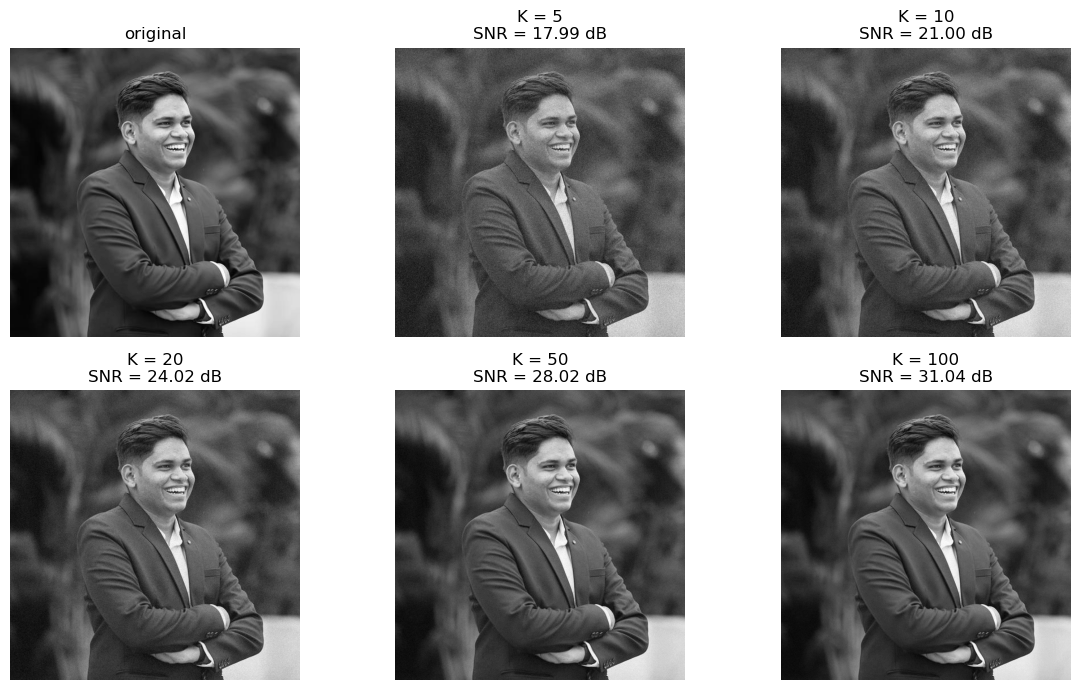

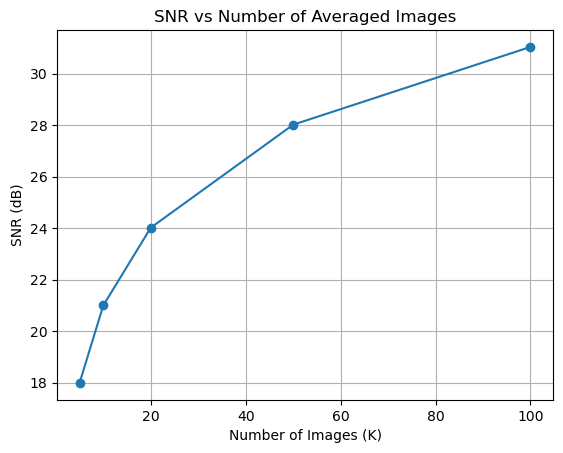

In [3]:
# Load grayscale portrait image
f = cv2.imread("Image2_gray.jpg", cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64)

def add_gaussian_noise(image, sigma):
    noise = np.random.normal(0, sigma, image.shape)
    return image + noise

#creating 100 noisy images
noisy_images = np.zeros((100, *f.shape))
sigma = 25
k_values = [5, 10, 20, 50, 100]
for i in range(100):
    noisy_images[i] = add_gaussian_noise(f, sigma)

#calculating various all gbar  
g_bar = np.zeros(5, dtype=object)
for i,k in enumerate(k_values):
    g_bar[i] = np.mean(noisy_images[:k], axis=0)

#SNR of each
SNR = np.zeros(5)
num = np.sum(f**2)
for i in range(5):
    den = np.sum((f - g_bar[i])**2)
    SNR[i] = 10 * np.log10(num / den)
    print("SNR of", i, " : ", SNR[i])
    
plt.figure(figsize=(12, 7))
plt.subplot(2, 3, 1)
plt.imshow(f, cmap='gray')
plt.title(f"original")
plt.axis('off')

for i,k in enumerate(k_values):
    plt.subplot(2, 3, i+2)
    plt.imshow(g_bar[i], cmap='gray')
    plt.title(f"K = {k}\nSNR = {SNR[i]:.2f} dB")
    plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure()
plt.plot(k_values, SNR, marker='o')
plt.xlabel("Number of Images (K)")
plt.ylabel("SNR (dB)")
plt.title("SNR vs Number of Averaged Images")
plt.grid(True)
plt.show()

## Part b : Image subtraction

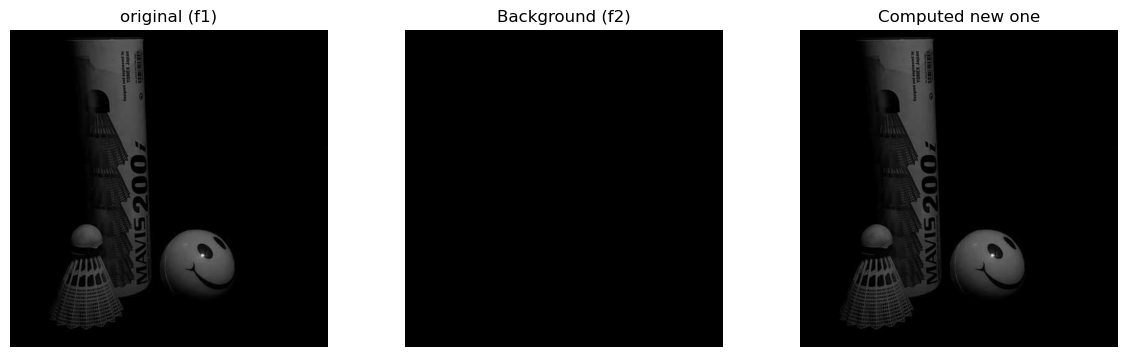

In [4]:
# Load grayscale black background image
f1 = cv2.imread("Image3_gray.jpg", cv2.IMREAD_GRAYSCALE)
f1 = f1.astype(np.float64)
f2 = np.zeros_like(f1) #background

g_new = np.abs(f1 - f2)

plt.figure(figsize=(12, 7))

plt.subplot(2, 3, 1)
plt.imshow(f1, cmap='gray')
plt.title(f"original (f1)")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(f2, cmap='gray')
plt.title(f"Background (f2)")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(g_new, cmap='gray')
plt.title(f"Computed new one")
plt.axis('off')

plt.tight_layout()
plt.show()

## Part c : Image Scaling

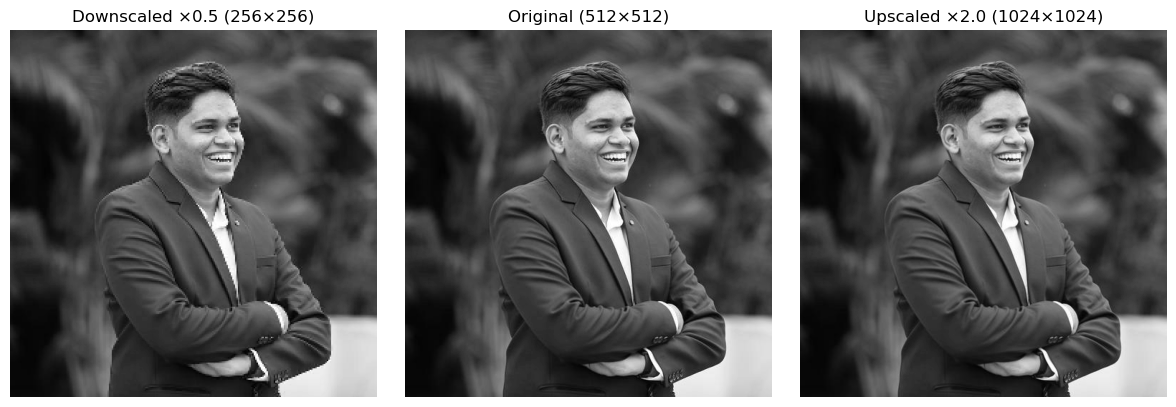

In [5]:
# Read grayscale portrait image
f = cv2.imread("Image2_gray.jpg", cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64)

def scale_nearest_inverse(image, scale):
    H, W = image.shape
    new_H = int(H * scale)
    new_W = int(W * scale)

    scaled_img = np.zeros((new_H, new_W))

    for i in range(new_H):
        for j in range(new_W):
            # Inverse mapping
            x = int(i / scale)
            y = int(j / scale)

            # Boundary check
            x = min(x, H - 1)
            y = min(y, W - 1)

            scaled_img[i, j] = image[x, y]

    return scaled_img

# Downscale and upscale
downscaled = scale_nearest_inverse(f, 0.5)   # 256×256
upscaled   = scale_nearest_inverse(f, 2.0)   # 1024×1024

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(downscaled, cmap='gray')
plt.title("Downscaled ×0.5 (256×256)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(f, cmap='gray')
plt.title("Original (512×512)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(upscaled, cmap='gray')
plt.title("Upscaled ×2.0 (1024×1024)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Part d : Image Shifting

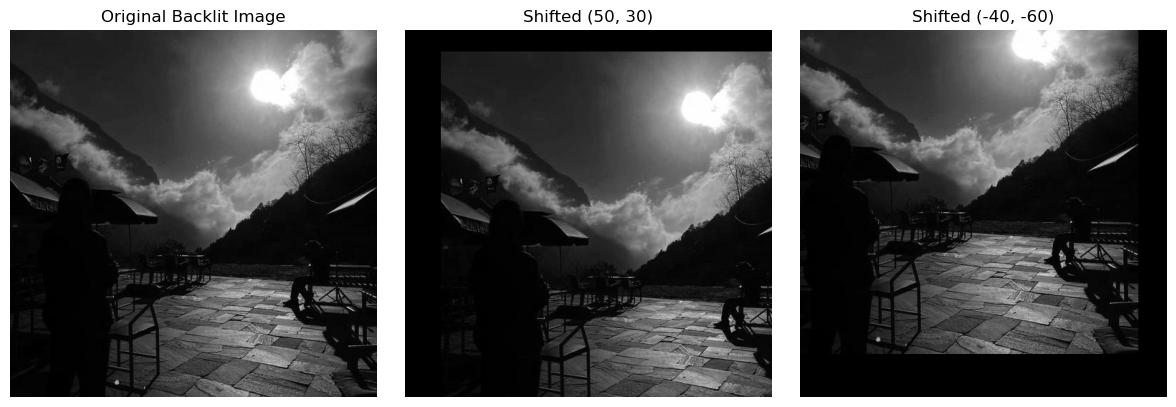

In [6]:
# Load backlit grayscale image
f = cv2.imread("Image1_gray.jpg", cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float64)

def shift_inverse(image, dx, dy):
    H, W = image.shape
    shifted = np.zeros((H, W))  # black background

    for i in range(H):
        for j in range(W):
            # Inverse mapping
            x = i - dy
            y = j - dx

            if 0 <= x < H and 0 <= y < W:
                shifted[i, j] = image[int(x), int(y)]

    return shifted

# Apply shifts
shift1 = shift_inverse(f, 50, 30)      # (dx, dy) = (50, 30)
shift2 = shift_inverse(f, -40, -60)    # (dx, dy) = (-40, -60)

# Display results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(f, cmap='gray')
plt.title("Original Backlit Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(shift1, cmap='gray')
plt.title("Shifted (50, 30)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(shift2, cmap='gray')
plt.title("Shifted (-40, -60)")
plt.axis('off')

plt.tight_layout()
plt.show()
